Task: Analyze the dataset and create graphs using seaborn and matplotlib.

In [11]:
import pandas as pd

In [12]:
data=pd.read_csv("dataset_netflix1_2.csv")
data.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

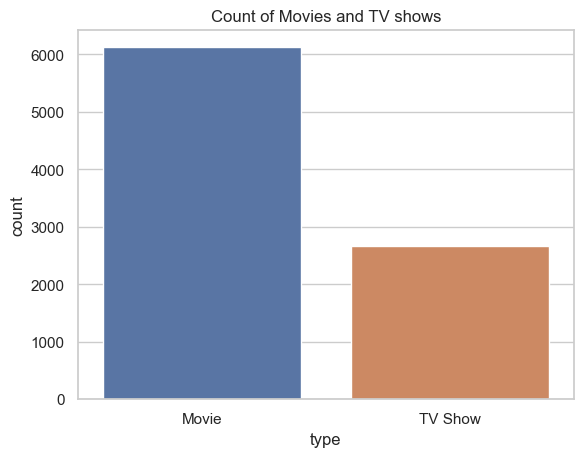

In [14]:
#Let's plot the count of movies and TV shows
sns.countplot(x='type',data=data)
plt.title('Count of Movies and TV shows')
plt.show()

On Netflix, there are more movies than TV shows.

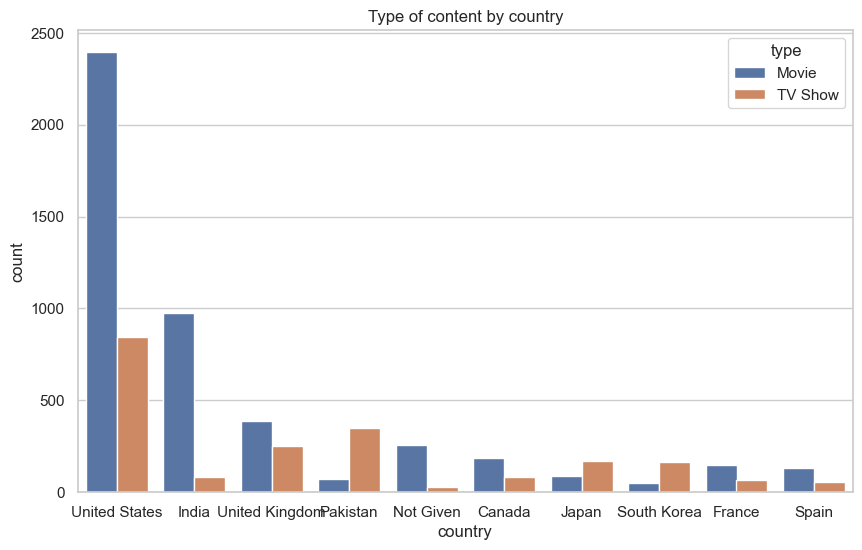

In [15]:
#Let's plot the graph between type of content watched based on country
plt.figure(figsize=(10,6))
sns.countplot(x='country',hue='type',data=data,order=data.country.value_counts().iloc[:10].index)
plt.title('Type of content by country')
plt.show()

Most of the content in Netflix is from the United States.

<Figure size 1200x600 with 0 Axes>

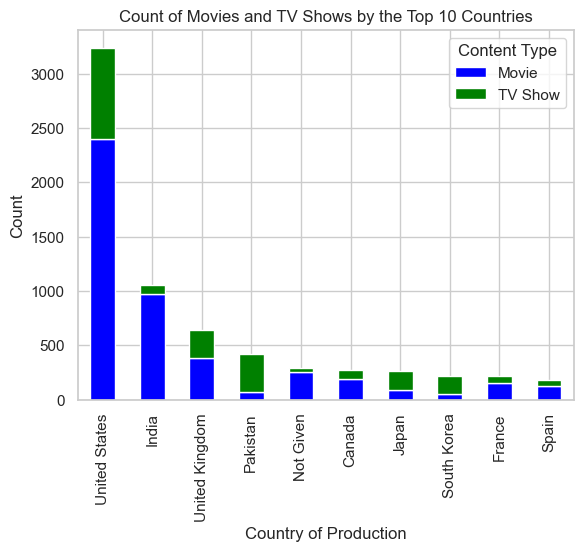

In [17]:
#Lets plot the same as above but in a stacked bar chart
# Create a new DataFrame with counts of movies and TV shows by country
country_counts = data.groupby(['country', 'type']).size().unstack().fillna(0)

# Sort the countries by the total count (sum of movies and TV shows) in descending order
country_counts['Total'] = country_counts.sum(axis=1)
country_counts = country_counts.sort_values(by='Total', ascending=False).head(10)

# Drop the 'Total' column
country_counts = country_counts.drop(columns='Total')

# Create a grouped bar chart
plt.figure(figsize=(12, 6))  # Optional: Set the figure size
sns.set(style="whitegrid")  # Optional: Set a grid background style

# Create the grouped bar chart
country_counts.plot(kind='bar', stacked=True, color=['blue', 'green'], legend=True)

# Add labels and a title
plt.xlabel("Country of Production")
plt.ylabel("Count")
plt.title("Count of Movies and TV Shows by the Top 10 Countries")

# Show the plot
plt.legend(title="Content Type", labels=['Movie', 'TV Show'])
plt.show()


Text(0.5, 1.0, 'Rating of content by country')

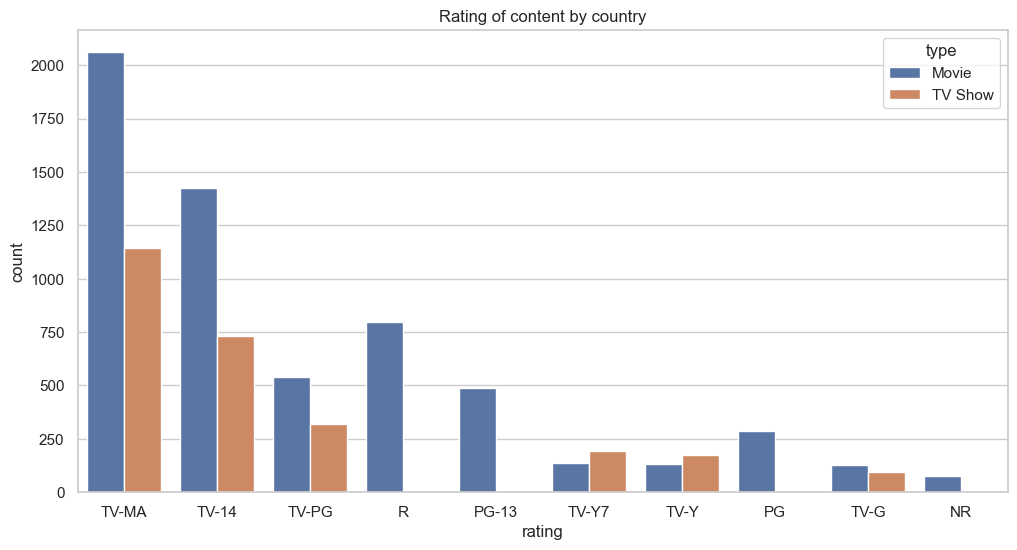

In [18]:
#Let's plot a graph on ratings of movies and TV shows ordered by the highest rating only for the top 10 countries
plt.figure(figsize=(12, 6))
sns.countplot(x='rating',hue='type',data=data,order=data.rating.value_counts().iloc[:10].index)
plt.title('Rating of content by country')

Text(0.5, 1.0, 'Count of Releases from 2010-2021')

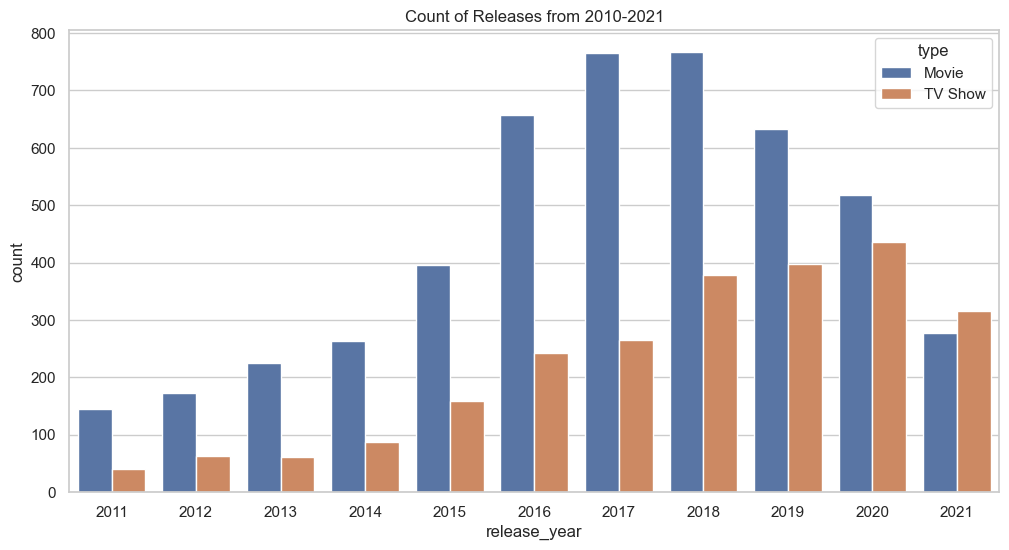

In [19]:
#Let's crete a histogram of release years for 2010-2021
plt.figure(figsize=(12, 6))
#plot of release years for 2010-2021
sns.countplot(x='release_year',hue='type',data=data[data['release_year']>2010])
plt.title('Count of Releases from 2010-2021')

Thank You